Attempting to load from: ../data/Clinical_and_Other_Features.xlsx
Loading data from: ../data/Clinical_and_Other_Features.xlsx
Data loaded successfully with shape: (922, 98)
Successfully loaded data from: ../data/Clinical_and_Other_Features.xlsx

Original DataFrame shape: (922, 98)
Checking for columns with 100% missing values...
Found 1 columns with 100% missing data. Dropping them.
DataFrame shape after dropping empty columns: (922, 97)

=== Dataset Overview ===
Number of samples: 922
Number of features: 97
Missing values: 10858 (12.14%)

=== Domains (Level 1 headers) ===
- Anti-Her2 Neu Therapy
- Chemotherapy
- Demographics
- Endocrine Therapy
- Follow Up
- MRI Findings
- MRI Technical Information
- Mammography Characteristics
- Near Complete Response
- Neoadjuvant therapy
- Pathologic Response to Neoadjuvant Therapy
- Patient Information
- Radiation Therapy
- Recurrence
- SURGERY
- Tumor Characteristics
- Tumor Response
- US features

=== Summary for domain: Demographics ===
Number 

/tmp/ipykernel_64594/946535089.py:239: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=rates_series.values, y=rates_series.index, palette="husl", orient='h')


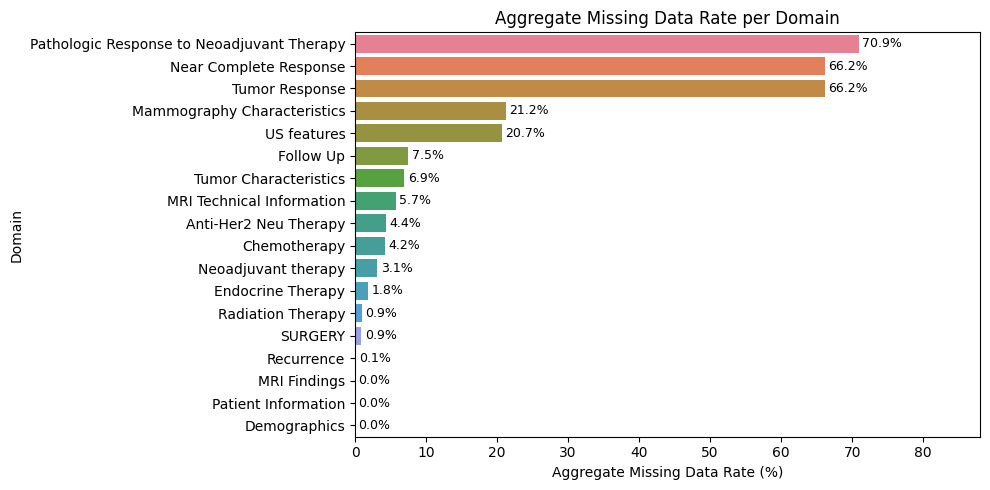


Script finished.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

def load_clinical_data(file_path):
    """
    Load the Clinical_and_Other_Features.xlsx file with multi-level headers.
    Handles the 3-level header structure described in the dataset.
    
    Args:
        file_path (str): Path to the Excel file
        
    Returns:
        pd.DataFrame: Dataframe with properly formatted multi-level headers
    """
    print(f"Loading data from: {file_path}")
    
    # First, check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist. Please check the path.")
    
    # Read the Excel file with header rows
    # We'll read the first few rows to determine the header structure
    header_df = pd.read_excel(file_path, nrows=5)
    
    # Determine where the actual data starts
    # Usually, in multi-level headers, the first few rows are headers
    # and the data starts after that
    # For Duke's Breast MRI dataset, we expect 3 levels of headers
    df = pd.read_excel(file_path, header=[0, 1, 2])
    
    print(f"Data loaded successfully with shape: {df.shape}")
    return df

def explore_data(df):
    """
    Basic exploration of the dataset.
    
    Args:
        df (pd.DataFrame): The loaded dataframe
        
    Returns:
        dict: Dictionary containing basic information about the dataset
    """
    info = {}
    
    # Basic information
    info['shape'] = df.shape
    info['columns'] = df.columns.tolist()
    info['domains'] = set([col[0] for col in df.columns if col[0] != ''])
    
    # Check for missing values
    missing_vals = df.isna().sum().sum()
    info['missing_values'] = missing_vals
    info['missing_percentage'] = (missing_vals / (df.shape[0] * df.shape[1])) * 100
    
    # Display the information
    print("\n=== Dataset Overview ===")
    print(f"Number of samples: {info['shape'][0]}")
    print(f"Number of features: {info['shape'][1]}")
    print(f"Missing values: {info['missing_values']} ({info['missing_percentage']:.2f}%)")
    print("\n=== Domains (Level 1 headers) ===")
    for domain in sorted(info['domains']):
        print(f"- {domain}")
    
    return info

def get_domain_columns(df, domain):
    """
    Get all columns belonging to a specific domain (level 1 header).
    
    Args:
        df (pd.DataFrame): The loaded dataframe
        domain (str): The domain name (level 1 header)
        
    Returns:
        list: list of columns in the specified domain
    """
    return [col for col in df.columns if col[0] == domain]

def flatten_column_names(df):
    """
    Convert multi-level column names to flattened strings for easier handling.
    
    Args:
        df (pd.DataFrame): DataFrame with multi-level columns
        
    Returns:
        pd.DataFrame: DataFrame with flattened column names
    """
    df_flat = df.copy()
    # Join level names with underscores, ignoring empty strings
    flat_columns = ['_'.join([str(l) for l in levels if l != '']) for levels in df.columns]
    df_flat.columns = flat_columns
    return df_flat

def summarize_domain(df, domain):
    """
    Summarize the columns within a specific domain.
    
    Args:
        df (pd.DataFrame): The loaded dataframe
        domain (str): The domain name to summarize
    """
    domain_cols = get_domain_columns(df, domain)
    
    print(f"\n=== Summary for domain: {domain} ===")
    print(f"Number of attributes: {len(domain_cols)}")
    
    print("\nAttributes (Level 2 headers):")
    for col in domain_cols:
        # Get the second level (attribute name)
        attribute = col[1]
        if attribute != '':
            # Get the third level (description or subtype)
            subtype = col[2] if col[2] != '' else 'N/A'
            print(f"- {attribute} ({subtype})")
    
    # Sample data for this domain
    print("\nSample data (first 5 rows):")
    sample_data = df[domain_cols].head()
    print(sample_data)

def main():
    """
    Main function to demonstrate loading and exploring the dataset.
    """
    # Use relative path as provided in the question
    file_path = "../data/Clinical_and_Other_Features.xlsx"
    
    try:
        # Try to load with the provided relative path
        df = load_clinical_data(file_path)
    except FileNotFoundError:
        # If that fails, ask for the correct path
        print(f"Could not find the file at {file_path}")
        print("Please make sure you're running this script from the correct directory")
        print("or provide the full path to the file.")
        
        # Alternative paths to try
        alt_paths = [
            "data/Clinical_and_Other_Features.xlsx",
            "./Clinical_and_Other_Features.xlsx"
        ]
        
        for alt_path in alt_paths:
            print(f"Trying alternative path: {alt_path}")
            try:
                df = load_clinical_data(alt_path)
                print(f"Success! Found file at {alt_path}")
                break
            except FileNotFoundError:
                continue
        else:
            print("Could not find the file with any of the attempted paths.")
            print("Please enter the full path to the file:")
            user_path = input().strip()
            df = load_clinical_data(user_path)
    
    # Basic exploration
    info = explore_data(df)
    
    # Explore a specific domain (example: 'Demographics')
    # You can replace 'Demographics' with any domain found in the dataset
    try:
        summarize_domain(df, 'Demographics')
    except:
        print("Could not find 'Demographics' domain. Please check the actual domain names in the dataset.")
    
    # Create a flattened version for easier handling
    df_flat = flatten_column_names(df)
    print("\n=== Flattened column names (first 10) ===")
    print(list(df_flat.columns)[:10])
    
    print("\nYou can now use the dataframe 'df' for further analysis!")
    return df, df_flat

# --- MODIFIED visualize_domain_missing_rates FUNCTION ---
def visualize_domain_missing_rates(df):
    """
    Calculates and visualizes the aggregate missing data rate for each
    Level 1 header (domain) in the DataFrame, adding labels on bars.

    Args:
        df (pd.DataFrame): The dataframe with multi-level headers.
    """
    if df.empty:
        print("\nDataFrame is empty. Cannot visualize missing rates.")
        return
    if not isinstance(df.columns, pd.MultiIndex):
        print("\nError: Cannot calculate domain missing rates. DataFrame does not have multi-level columns.")
        return

    print("\n=== Visualizing Aggregate Missing Data Rates per Domain (Level 1 Header) ===")

    # Get unique Level 1 headers (domains) from the current df columns
    domains = sorted([domain for domain in df.columns.get_level_values(0).unique() if str(domain).strip()])

    if not domains:
        print("No valid domains (Level 1 headers) found to analyze in the current DataFrame.")
        return

    domain_rates = {}
    for domain in domains:
        try:
            domain_df = df.loc[:, domain]
            if isinstance(domain_df, pd.Series):
               total_missing = domain_df.isna().sum()
               total_cells = domain_df.size
            elif isinstance(domain_df, pd.DataFrame):
                 total_missing = domain_df.isna().sum().sum()
                 total_cells = domain_df.size
            else:
                total_missing = 0
                total_cells = 0
            rate = (total_missing / total_cells) * 100 if total_cells > 0 else 0
            domain_rates[domain] = rate
        except KeyError:
             print(f"Warning: Could not select columns for domain '{domain}'. Skipping.")
             continue

    if not domain_rates:
        print("No missing rates could be calculated for any remaining domain.")
        return

    rates_series = pd.Series(domain_rates).sort_values(ascending=False)

    if rates_series.empty:
        print("No domains with missing data found in the remaining columns.")
        return

    # Create the plot
    # Increased figure height/width slightly for better horizontal layout
    plt.figure(figsize=(10, 5))
    # Set orient='h', swap x and y assignments
    ax = sns.barplot(x=rates_series.values, y=rates_series.index, palette="husl", orient='h')

    # --- Add text labels next to bars ---
    for p in ax.patches: # Iterate through the bars ('patches') on the Axes
        width = p.get_width() # Get the width of the current bar (value for horizontal bars)
        # Add text annotation slightly to the right of the bar
        if width >= 0: # Make sure width is non-negative
            ax.text(x=width + 0.5,                         # x-coordinate: slightly after the end of the bar
                    y=p.get_y() + p.get_height() / 2.,     # y-coordinate: vertically centered on the bar
                    s=f'{width:.1f}%',                     # Text string: formatted value to 1 decimal place + '%'
                    ha='left',                             # Horizontal alignment: left (so text starts at x position)
                    va='center',                           # Vertical alignment: center
                    fontsize=9)                            # Font size (optional)
    # --- End of text label code ---

    # Adjust labels for horizontal orientation
    plt.xlabel("Aggregate Missing Data Rate (%)") # X-axis now shows the rate
    plt.ylabel("Domain")     # Y-axis now shows the domain

    plt.title("Aggregate Missing Data Rate per Domain")

    # Adjust ylim to make sure labels fit, especially near 100%
    current_max = rates_series.max() if not rates_series.empty else 0
    plt.xlim(0, max(80, current_max) * 1.10) # Set X limit, adding 10% headroom

    plt.tight_layout()
    plt.show()

# --- MODIFIED main FUNCTION ---
def main():
    """
    Main function to load, clean (drop empty columns), explore,
    and visualize the dataset.
    """
    possible_paths = [
        "../data/Clinical_and_Other_Features.xlsx",
        "data/Clinical_and_Other_Features.xlsx",
        "Clinical_and_Other_Features.xlsx",
    ]
    df = None
    loaded_path = None

    # --- Load Data ---
    for path in possible_paths:
        try:
            print(f"Attempting to load from: {path}")
            df = load_clinical_data(path)
            loaded_path = path
            print(f"Successfully loaded data from: {loaded_path}")
            break
        except FileNotFoundError:
            print(f"File not found at: {path}")
        except Exception as e:
            print(f"An error occurred loading {path}: {e}")

    # --- Handle Loading Failure ---
    if df is None:
        print("\nCould not automatically find the data file.")
        print("Please enter the full path to 'Clinical_and_Other_Features.xlsx':")
        user_path = input().strip()
        try:
             df = load_clinical_data(user_path)
             loaded_path = user_path
             print(f"Successfully loaded data from: {loaded_path}")
        except FileNotFoundError:
             print(f"Error: File not found at the provided path: {user_path}")
             return None, None
        except Exception as e:
             print(f"An error occurred loading {user_path}: {e}")
             return None, None

    print(f"\nOriginal DataFrame shape: {df.shape}")

    # --- Drop Columns with 100% Missing Data ---
    print("Checking for columns with 100% missing values...")
    if df.empty:
        print("DataFrame is empty, skipping column drop check.")
    else:
        # is_all_na = df.isna().all(axis=0) # More direct way
        missing_rates = df.isna().mean(axis=0) * 100 # Calculate % missing per column
        cols_to_drop = missing_rates[missing_rates == 100].index # Get index of columns with 100% missing

        if not cols_to_drop.empty:
            print(f"Found {len(cols_to_drop)} columns with 100% missing data. Dropping them.")
            # Example: Printing first few dropped columns if list is long
            # print("Columns being dropped (showing first 5):")
            # for col in cols_to_drop[:5]:
            #    print(f" - {col}")
            # if len(cols_to_drop) > 5:
            #    print(f"   ... and {len(cols_to_drop) - 5} more.")

            df = df.drop(columns=cols_to_drop)
            print(f"DataFrame shape after dropping empty columns: {df.shape}")
        else:
            print("No columns with 100% missing values found.")
    # --- End Column Dropping ---


    # --- Proceed with the cleaned DataFrame ---
    if df.empty:
         print("\nDataFrame is empty after dropping columns. Cannot proceed with analysis.")
         return df, None # Return empty df and None for flat df

    # Basic exploration
    info = explore_data(df) # Uses the cleaned df

    # Explore a specific domain (example)
    available_domains = info.get('domains', [])
    if 'Demographics' in available_domains:
         summarize_domain(df, 'Demographics') # Uses the cleaned df
    elif available_domains:
        first_domain = available_domains[0]
        print(f"\n'Demographics' domain not found or empty. Summarizing the first available domain: '{first_domain}'")
        summarize_domain(df, first_domain) # Uses the cleaned df
    else:
        print("\nNo domains available to summarize after cleaning.")

    # Flattened version (calculated AFTER dropping columns)
    df_flat = flatten_column_names(df)
    print("\n=== Flattened column names (first 10 after dropping empty) ===")
    print(list(df_flat.columns)[:10])

    # Domain-level visualization (uses the cleaned df)
    visualize_domain_missing_rates(df)

    print("\nScript finished.")
    return df, df_flat # Return the cleaned df and its flattened version


if __name__ == "__main__":
    try:
        plt.ioff()
        df_main, df_flat_main = main()
        plt.ion()
        # plt.show() # Called within visualize function
    except Exception as e:
        print(f"\nAn error occurred during execution: {e}")
        # plt.ion() # Turn interactive mode on in case of error after plot creation
        # plt.show()

Trying to load from: ../data/Clinical_and_Other_Features.xlsx
Successfully loaded from ../data/Clinical_and_Other_Features.xlsx

=== Molecular Subtype Analysis with Descriptions ===
Column identifier: ('Tumor Characteristics', 'Mol Subtype', '{0 = luminal-like,\n1 = ER/PR pos, HER2 pos,\n2 = her2,\n3 = trip neg}')

Mapping Used:
0 = luminal-like
0.0 = luminal-like
0 = luminal-like
1 = ER/PR pos, HER2 pos
1.0 = ER/PR pos, HER2 pos
1 = ER/PR pos, HER2 pos
2 = her2
2.0 = her2
2 = her2
3 = trip neg
3.0 = trip neg
3 = trip neg

Missing values: 0 (0.00%)

Value Counts (with descriptions):
(Tumor Characteristics, Mol Subtype, {0 = luminal-like,\n1 = ER/PR pos, HER2 pos,\n2 = her2,\n3 = trip neg})
luminal-like           595
trip neg               164
ER/PR pos, HER2 pos    104
her2                    59
Name: count, dtype: int64

Percentages:
luminal-like: 64.53%
trip neg: 17.79%
ER/PR pos, HER2 pos: 11.28%
her2: 6.4%


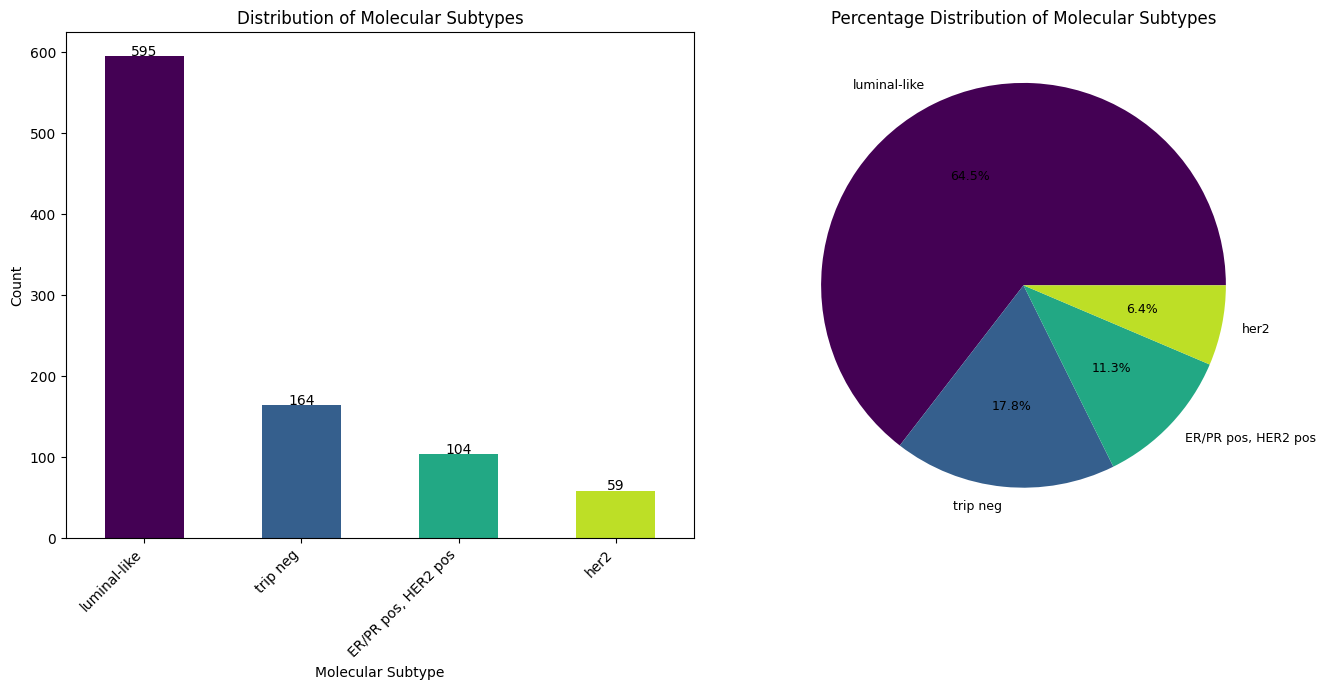

Using ('Patient Information', 'Patient ID', 'Unnamed: 0_level_2') as patient identifier
Added ('MRI Technical Information', 'Image Position of Patient', 'Unnamed: 7_level_2') as Age
Added ('MRI Technical Information', 'Contrast Agent', 'GADAVIST=0,MAGNEVIST=1,MMAGNEVIST=2,MULTIHANCE=3,Name of agent not stated(but ContrastBolusAgent tag was present)=4, ContrastBolusAgent Tag Absent = 5 ') as Age
Added ('Tumor Characteristics', 'Staging(Tumor Size)# [T]', 'Unnamed: 28_level_2') as Tumor_Size
Added ('Tumor Characteristics', 'Tumor Grade', 'Tumor Grade(T)\n(Tubule)') as Tumor_Grade
Added ('Tumor Characteristics', 'Tumor Grade', 'Tumor Grade(N)\n(Nuclear)') as Tumor_Grade
Added ('Tumor Characteristics', 'Tumor Grade', 'Tumor Grade(M)\n(Mitotic)') as Tumor_Grade
Added ('Tumor Characteristics', 'Nottingham grade', '1=low 2=intermediate 3=high\n') as Tumor_Grade
Added ('Follow Up', 'Age at last contact in EMR f/u(days)(from the date of diagnosis) ,last time patient known to be alive, unless ag

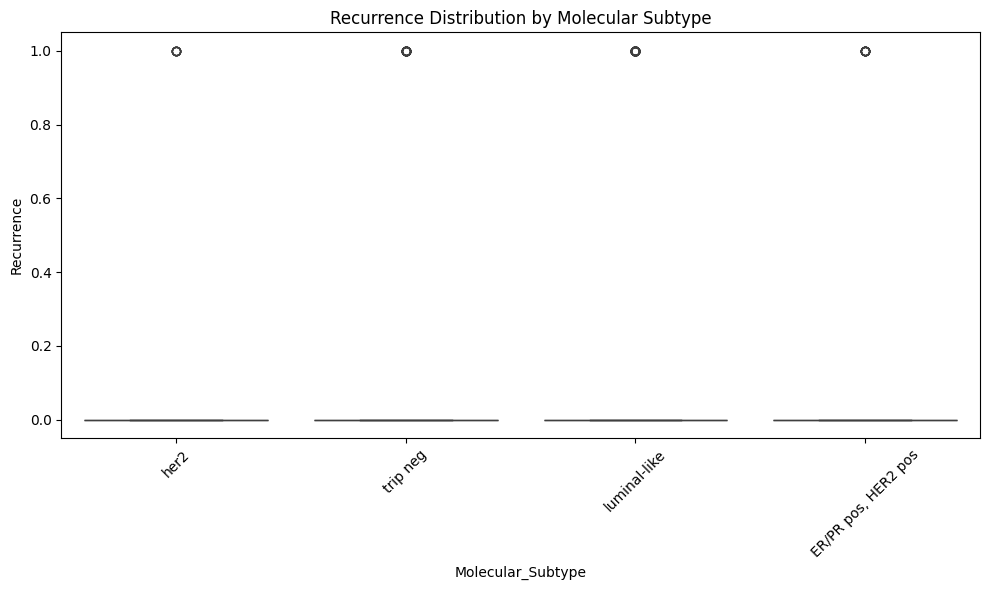


=== Treatment_Response by Molecular Subtype ===
                     count      mean  median       std  min  max
Molecular_Subtype                                               
ER/PR pos, HER2 pos     55  2.000000     2.0  0.693889  1.0  3.0
her2                    30  1.833333     2.0  0.592093  1.0  3.0
luminal-like           142  2.028169     2.0  0.504500  1.0  3.0
trip neg                85  1.941176     2.0  0.542326  1.0  3.0


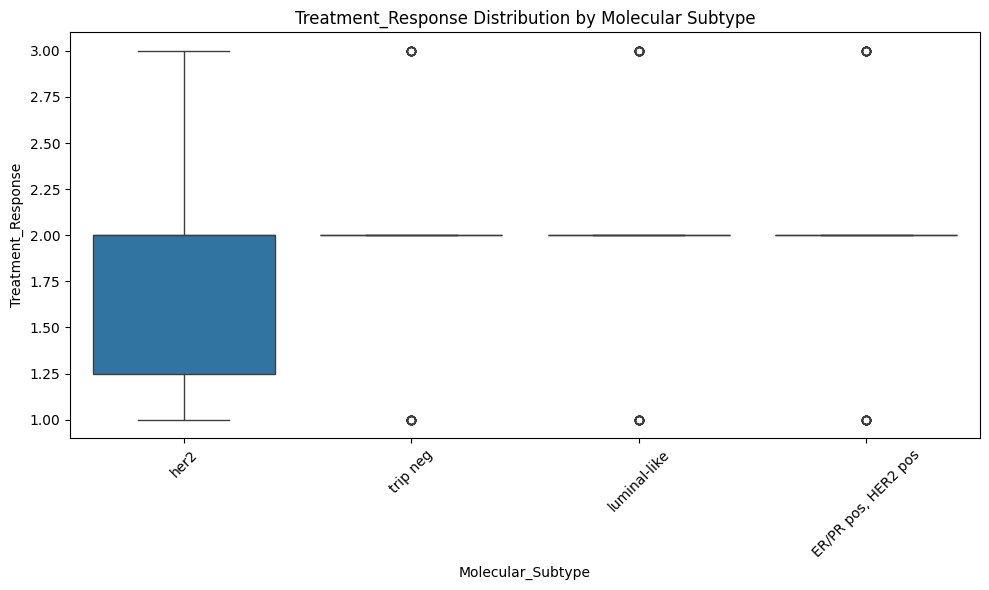


=== Tumor_Size by Molecular Subtype ===
                     count      mean  median       std  min  max
Molecular_Subtype                                               
ER/PR pos, HER2 pos    104  1.759615     2.0  0.756784  1.0  4.0
her2                    57  1.877193     2.0  0.656565  1.0  3.0
luminal-like           591  1.644670     2.0  0.731125  1.0  4.0
trip neg               164  1.798780     2.0  0.784668  1.0  4.0


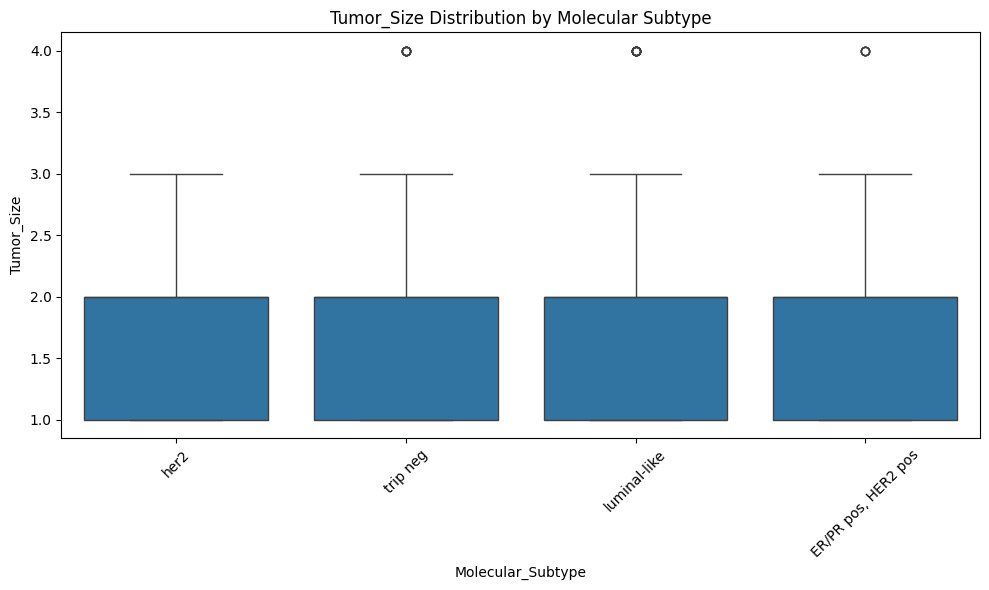

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Define the mapping for molecular subtypes
MOL_SUBTYPE_MAPPING = {
    '0': 'luminal-like',
    '0.0': 'luminal-like',
    0: 'luminal-like',
    '1': 'ER/PR pos, HER2 pos',
    '1.0': 'ER/PR pos, HER2 pos',
    1: 'ER/PR pos, HER2 pos',
    '2': 'her2',
    '2.0': 'her2',
    2: 'her2',
    '3': 'trip neg',
    '3.0': 'trip neg',
    3: 'trip neg'
}

def analyze_mol_subtype_with_descriptions(df):
    """
    Extract and analyze the Molecular Subtype data with descriptions.
    Maps numeric codes to their respective descriptions.
    
    Args:
        df (pd.DataFrame): The loaded dataframe with multi-level headers
        
    Returns:
        tuple: (original data series, mapped data series)
    """
    # Find the Mol Subtype column
    mol_subtype_col = None
    
    # Search for the column with different possible naming conventions
    for col in df.columns:
        if col[0] == 'Tumor Characteristics' and any(term in col[1].lower() for term in ['mol subtype', 'molecular subtype']):
            mol_subtype_col = col
            break
    
    if mol_subtype_col is None:
        # If not found, list available columns in Tumor Characteristics domain
        print("Could not find Molecular Subtype column. Available columns in Tumor Characteristics domain:")
        tumor_cols = [col for col in df.columns if col[0] == 'Tumor Characteristics']
        for col in tumor_cols:
            print(f"- {col}")
        return None, None
    
    # Extract the original data
    original_data = df[mol_subtype_col].copy()
    
    # Create a new series with mapped descriptions
    mapped_data = original_data.copy()
    
    # Apply mapping
    mapped_data = mapped_data.map(lambda x: MOL_SUBTYPE_MAPPING.get(x, x))
    
    print("\n=== Molecular Subtype Analysis with Descriptions ===")
    print(f"Column identifier: {mol_subtype_col}")
    
    # Show the mapping being used
    print("\nMapping Used:")
    for code, description in MOL_SUBTYPE_MAPPING.items():
        print(f"{code} = {description}")
    
    # Count missing values
    missing = mapped_data.isna().sum()
    missing_pct = (missing / len(mapped_data)) * 100
    print(f"\nMissing values: {missing} ({missing_pct:.2f}%)")
    
    # Value distribution with descriptions
    value_counts = mapped_data.value_counts(dropna=False).sort_values(ascending=False)
    print("\nValue Counts (with descriptions):")
    print(value_counts)
    
    # Calculate percentages
    value_pcts = (value_counts / value_counts.sum() * 100).round(2)
    print("\nPercentages:")
    for val, pct in value_pcts.items():
        if pd.isna(val):
            print(f"Missing: {pct}%")
        else:
            print(f"{val}: {pct}%")
    
    # Visualization with descriptions
    # Filter out NaN for better visualization
    value_counts_no_na = value_counts.drop(np.nan) if np.nan in value_counts else value_counts
    
    plt.figure(figsize=(14, 7))
    
    # Bar plot
    plt.subplot(1, 2, 1)
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(value_counts_no_na)))
    ax1 = value_counts_no_na.plot(kind='bar', color=colors)
    plt.title('Distribution of Molecular Subtypes')
    plt.xlabel('Molecular Subtype')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    
    # Add count labels on top of bars
    for i, count in enumerate(value_counts_no_na):
        ax1.text(i, count + 0.5, str(count), ha='center')
    
    # Pie chart with descriptions
    plt.subplot(1, 2, 2)
    value_pcts_no_na = (value_counts_no_na / value_counts_no_na.sum() * 100).round(2)
    wedges, texts, autotexts = plt.pie(
        value_counts_no_na, 
        labels=value_counts_no_na.index, 
        autopct='%1.1f%%',
        colors=colors,
        textprops={'fontsize': 9}
    )
    plt.title('Percentage Distribution of Molecular Subtypes')
    
    plt.tight_layout()
    plt.show()
    
    return original_data, mapped_data

def create_summary_with_descriptions(df):
    """
    Create a comprehensive summary of molecular subtype data with descriptions.
    
    Args:
        df (pd.DataFrame): The loaded dataframe with multi-level headers
        
    Returns:
        pd.DataFrame: Summary dataframe with original codes and descriptions
    """
    # Find the Mol Subtype column
    mol_subtype_col = None
    for col in df.columns:
        if col[0] == 'Tumor Characteristics' and any(term in col[1].lower() for term in ['mol subtype', 'molecular subtype']):
            mol_subtype_col = col
            break
    
    if mol_subtype_col is None:
        print("Could not find Molecular Subtype column")
        return None
    
    # Extract the data
    mol_subtype_original = df[mol_subtype_col].copy()
    
    # Create a new dataframe for the summary
    summary_df = pd.DataFrame({
        'Original_Code': mol_subtype_original
    })
    
    # Add the description column
    summary_df['Description'] = summary_df['Original_Code'].map(lambda x: MOL_SUBTYPE_MAPPING.get(x, 'Unknown'))
    
    # Try to find a patient ID column
    patient_id_col = None
    for col in df.columns:
        if any(id_term in col[1].lower() for id_term in ['patient', 'id', 'subject', 'case']):
            patient_id_col = col
            print(f"Using {col} as patient identifier")
            break
    
    if patient_id_col:
        summary_df['Patient_ID'] = df[patient_id_col]
    
    # Look for other important columns to add to the summary
    # Common columns of interest
    columns_of_interest = {
        'age': 'Age',
        'stage': 'Tumor_Stage',
        'grade': 'Tumor_Grade',
        'size': 'Tumor_Size',
        'treatment': 'Treatment'
    }
    
    for col in df.columns:
        for keyword, column_name in columns_of_interest.items():
            if keyword in col[1].lower():
                summary_df[column_name] = df[col]
                print(f"Added {col} as {column_name}")
                break
    
    # Print summary statistics
    print("\n=== Summary Statistics by Molecular Subtype ===")
    for subtype_desc in MOL_SUBTYPE_MAPPING.values():
        subtype_count = (summary_df['Description'] == subtype_desc).sum()
        subtype_pct = (subtype_count / len(summary_df)) * 100
        print(f"{subtype_desc}: {subtype_count} patients ({subtype_pct:.2f}%)")
    
    # Return the first 10 rows as a sample
    print("\n=== Sample of Patient-Level Summary ===")
    print(summary_df.head(10))
    
    return summary_df

def compare_subtypes_characteristics(df):
    """
    Compare characteristics across different molecular subtypes.
    
    Args:
        df (pd.DataFrame): The loaded dataframe with multi-level headers
        
    Returns:
        dict: Dictionary with comparison results
    """
    results = {}
    
    # Find the Mol Subtype column
    mol_subtype_col = None
    for col in df.columns:
        if col[0] == 'Tumor Characteristics' and any(term in col[1].lower() for term in ['mol subtype', 'molecular subtype']):
            mol_subtype_col = col
            break
    
    if mol_subtype_col is None:
        print("Could not find Molecular Subtype column")
        return None
    
    # Create the analysis dataframe
    analysis_df = pd.DataFrame({
        'Molecular_Subtype_Code': df[mol_subtype_col]
    })
    
    # Map the codes to descriptions
    analysis_df['Molecular_Subtype'] = analysis_df['Molecular_Subtype_Code'].map(
        lambda x: MOL_SUBTYPE_MAPPING.get(x, 'Unknown')
    )
    
    # Variables to look for comparison
    comparison_variables = {
        'age': 'Age',
        'survival': 'Survival',
        'recurrence': 'Recurrence',
        'response': 'Treatment_Response',
        'size': 'Tumor_Size'
    }
    
    # Find and add these variables
    for keyword, var_name in comparison_variables.items():
        for col in df.columns:
            if keyword in col[1].lower():
                analysis_df[var_name] = df[col]
                print(f"Added {col} as {var_name} for comparison")
                break
    
    # Perform comparisons for each available variable
    for var_name in comparison_variables.values():
        if var_name in analysis_df.columns:
            # Check if the variable is numeric
            if pd.api.types.is_numeric_dtype(analysis_df[var_name]):
                # Calculate statistics by subtype
                stats = analysis_df.groupby('Molecular_Subtype')[var_name].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
                results[var_name] = stats
                
                print(f"\n=== {var_name} by Molecular Subtype ===")
                print(stats)
                
                # Visualize
                plt.figure(figsize=(10, 6))
                sns.boxplot(x='Molecular_Subtype', y=var_name, data=analysis_df)
                plt.title(f'{var_name} Distribution by Molecular Subtype')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()
            else:
                # For categorical variables, do cross-tabulation
                crosstab = pd.crosstab(
                    analysis_df[var_name],
                    analysis_df['Molecular_Subtype'],
                    normalize='columns'
                ) * 100
                
                results[var_name] = crosstab
                
                print(f"\n=== {var_name} Distribution (%) by Molecular Subtype ===")
                print(crosstab.round(2))
    
    return results

def main_with_descriptions():
    """
    Main function to demonstrate molecular subtype analysis with descriptions
    """
    # Try several possible file paths
    potential_paths = [
        "../data/Clinical_and_Other_Features.xlsx",
        "data/Clinical_and_Other_Features.xlsx",
        "./Clinical_and_Other_Features.xlsx"
    ]
    
    df = None
    for path in potential_paths:
        try:
            print(f"Trying to load from: {path}")
            df = pd.read_excel(path, header=[0, 1, 2])
            print(f"Successfully loaded from {path}")
            break
        except Exception as e:
            print(f"Failed to load from {path}: {str(e)}")
    
    if df is None:
        print("Could not load the file. Please provide the full path:")
        user_path = input().strip()
        df = pd.read_excel(user_path, header=[0, 1, 2])
    
    # Analyze with descriptions
    original_data, mapped_data = analyze_mol_subtype_with_descriptions(df)
    
    # Create patient-level summary
    summary_df = create_summary_with_descriptions(df)
    
    # Compare characteristics across subtypes
    comparison_results = compare_subtypes_characteristics(df)
    
    return df, original_data, mapped_data, summary_df, comparison_results

if __name__ == "__main__":
    df, original_data, mapped_data, summary_df, comparison_results = main_with_descriptions()